In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from sklearn.cluster import KMeans

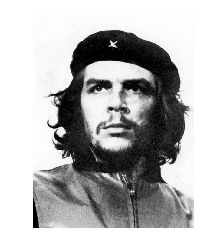

In [35]:
I=Image.open("imagen2.png")
I

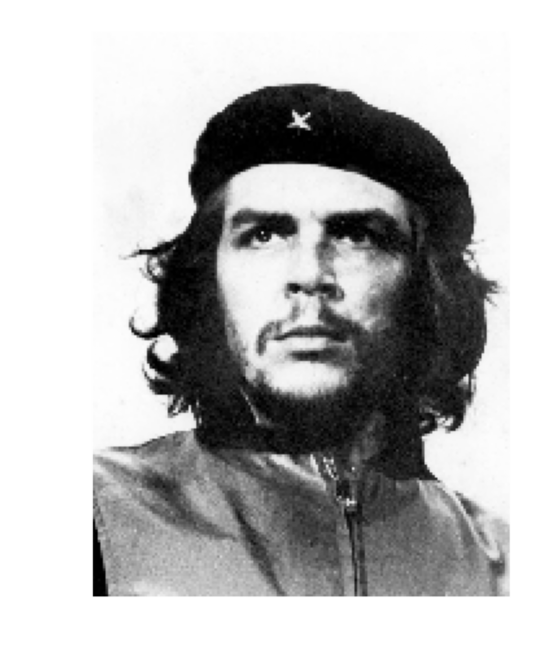

In [36]:
I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In [37]:
w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', num_colores)

Número de pixels  =  51408
Número de colores =  233


In [38]:
R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]

In [39]:
XR = R.reshape((-1, 1))  
XG = G.reshape((-1, 1)) 
XB = B.reshape((-1, 1)) 

X = np.concatenate((XR,XG,XB),axis=1)

In [40]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(n_clusters=2)

In [41]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [42]:
m = XR.shape
for i in range(m[0]):
    XR[i] = centroides[etiquetas[i]][0] 
    XG[i] = centroides[etiquetas[i]][1] 
    XB[i] = centroides[etiquetas[i]][2] 
XR.shape = R.shape 
XG.shape = G.shape
XB.shape = B.shape 
XR = XR[:, :, np.newaxis]  
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]

Y = np.concatenate((XR,XG,XB),axis=2)

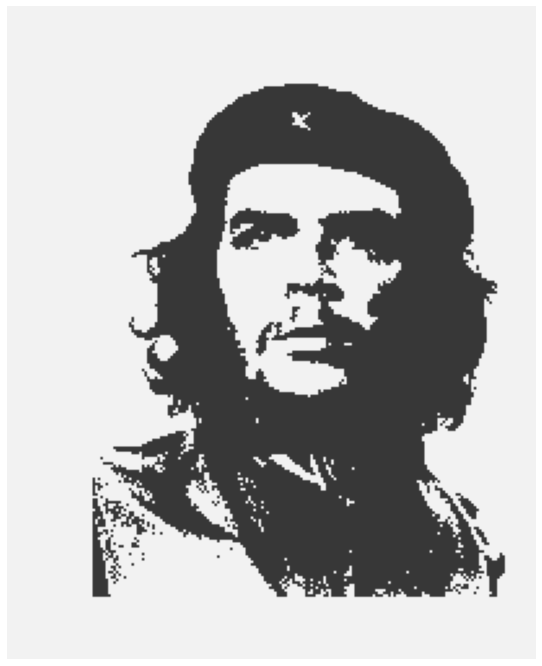

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()

In [44]:
print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', n)

Número de pixels  =  51408
Número de colores =  2


In [45]:
Y1 = np.floor(Y*255)
Image.fromarray(Y1.astype(np.uint8)).save("tienda_comprimida.jpg")